# Top2Vec Tutorial

## Working Of Top2Vec:


1.   Generate embedding vectors for documents and words.
2.   Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
3. Cluster the vectors using a clustering algorithm such as HDBSCAN.
4. Assign topics to each cluster.

In [ ]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
     |████████████████████████████████| 88 kB 9.0 MB/s 
     |████████████████████████████████| 5.2 MB 54.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.9 MB 48.6 MB/s 
     |████████████████████████████████| 1.1 MB 63.5 MB/s 
     |████████████████████████████████| 578.0 MB 15 kB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 4.6 MB 51.9 MB/s 
     |████████████████████████████████| 511.8 MB 9.2 kB/s 
     |████████████████████████████████| 511.7 MB 6.9 kB/s 
     |████████████████████████████████| 511.7 MB 4.4 kB/s 
     |████████████████████████████████| 4.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

## Read the Data

In [ ]:
# Mount your google drive and give access to the colab to access its files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Place the first decade csv in your Google drive which you can download from this link https://drive.google.com/file/d/18ZGDty-Qsinvo1mswAB7Xp9bzO7NmL6J/view?usp=sharing
# Copy the path of the file and paste it here inside read csv
df=pd.read_csv('/content/drive/MyDrive/yearly_CSV/first_decade.csv')

In [ ]:
df = df.applymap(str)

In [ ]:
names=df.AwardTitle.tolist()
unique_names=[]
for i,name in enumerate(names):
  unique_name=f"{i:04}_{name}"
  unique_names.append(unique_name)  

In [ ]:
len(unique_names)

3859

In [ ]:
docs=df.LongName2.tolist()

In [ ]:
model=Top2Vec(docs ,speed ="fast-learn",document_ids=unique_names)

2022-09-23 04:33:54,429 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-09-23 04:33:54,497 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-23 04:34:01,649 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-23 04:34:27,966 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-23 04:34:28,169 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.document_ids

array(['0000_nan', '0001_nan', '0002_nan', ...,
       '3856_Translation of Foreign Scientific & Technical Articles Into English - Special Foreign Currency',
       '3857_Services Necessary to Measure Densities of Radar Images on Some 7500 Frames of 35 Mm Film (C460)',
       '3858_Services Necessary to Measure Densities of Radar Images on Some 7500 Frames of 35 Mm Film (C460)'],
      dtype='<U185')

In [ ]:
unique_names2=[]
for name in unique_names:
  name=name.replace(", ","_").replace(" ","_")
  unique_names2.append(name)

unique_names_array = np.asarray(unique_names2)

In [ ]:
unique_names_array

array(['0000_nan', '0001_nan', '0002_nan', ...,
       '3856_Translation_of_Foreign_Scientific_&_Technical_Articles_Into_English_-_Special_Foreign_Currency',
       '3857_Services_Necessary_to_Measure_Densities_of_Radar_Images_on_Some_7500_Frames_of_35_Mm_Film_(C460)',
       '3858_Services_Necessary_to_Measure_Densities_of_Radar_Images_on_Some_7500_Frames_of_35_Mm_Film_(C460)'],
      dtype='<U182')

In [ ]:
model.document_ids

array(['0000_nan', '0001_nan', '0002_nan', ...,
       '3856_Translation of Foreign Scientific & Technical Articles Into English - Special Foreign Currency',
       '3857_Services Necessary to Measure Densities of Radar Images on Some 7500 Frames of 35 Mm Film (C460)',
       '3858_Services Necessary to Measure Densities of Radar Images on Some 7500 Frames of 35 Mm Film (C460)'],
      dtype='<U185')

In [ ]:
# size of extracted topics 

topic_sizes, topic_nums =model.get_topic_sizes()
print(topic_sizes)

[395 382 371 371 370 364 345 327 324 315 295]


In [ ]:
# number of Topics generated 
print(topic_nums)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(10)

In [ ]:
# words related to each Topic or Theme
for words, scores, num in zip(topic_words, word_scores, topic_nums):
  print(num)
  print(f"Words : {words}")

0
Words : ['and' 'molecular' 'earth' 'geospace' 'grants' 'systems' 'materials'
 'organismal' 'programs' 'computing' 'cognitive' 'environmental'
 'engineering' 'behavioral' 'directorate' 'information' 'division'
 'sciences' 'biology' 'div' 'integrative' 'direct' 'polar' 'of' 'sci'
 'mathematical' 'nan' 'intelligent' 'bioscience' 'astronomical'
 'communication' 'foundations' 'chemistry' 'physics' 'cellular' 'for'
 'office' 'agreements' 'opp' 'research' 'atmospheric' 'biological']
1
Words : ['biology' 'environmental' 'for' 'of' 'and' 'physics' 'sci' 'division'
 'computing' 'biological' 'information' 'bioscience' 'cellular'
 'atmospheric' 'communication' 'molecular' 'sciences' 'behavioral'
 'programs' 'div' 'cognitive' 'nan' 'intelligent' 'office' 'earth'
 'grants' 'chemistry' 'directorate' 'foundations' 'mathematical' 'systems'
 'opp' 'polar' 'organismal' 'agreements' 'direct' 'astronomical'
 'geospace' 'engineering' 'research' 'materials' 'integrative']
2
Words : ['molecular' 'materials'

In [ ]:
# size of first decade
len(df)

3859

## Training a Top2Vec Model

## Viewing the Number of Topics

In [ ]:
model.get_num_topics()

11

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes


array([395, 382, 371, 371, 370, 364, 345, 327, 324, 315, 295])

In [ ]:
topic_nums

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Getting Keywords for Each Topic

In [ ]:
model.topic_words

array([['and', 'molecular', 'earth', 'geospace', 'grants', 'systems',
        'materials', 'organismal', 'programs', 'computing', 'cognitive',
        'environmental', 'engineering', 'behavioral', 'directorate',
        'information', 'division', 'sciences', 'biology', 'div',
        'integrative', 'direct', 'polar', 'of', 'sci', 'mathematical',
        'nan', 'intelligent', 'bioscience', 'astronomical',
        'communication', 'foundations', 'chemistry', 'physics',
        'cellular', 'for', 'office', 'agreements', 'opp', 'research',
        'atmospheric', 'biological'],
       ['biology', 'environmental', 'for', 'of', 'and', 'physics', 'sci',
        'division', 'computing', 'biological', 'information',
        'bioscience', 'cellular', 'atmospheric', 'communication',
        'molecular', 'sciences', 'behavioral', 'programs', 'div',
        'cognitive', 'nan', 'intelligent', 'office', 'earth', 'grants',
        'chemistry', 'directorate', 'foundations', 'mathematical',
        'syst

In [ ]:
model.topic_words[0]

array(['and', 'molecular', 'earth', 'geospace', 'grants', 'systems',
       'materials', 'organismal', 'programs', 'computing', 'cognitive',
       'environmental', 'engineering', 'behavioral', 'directorate',
       'information', 'division', 'sciences', 'biology', 'div',
       'integrative', 'direct', 'polar', 'of', 'sci', 'mathematical',
       'nan', 'intelligent', 'bioscience', 'astronomical',
       'communication', 'foundations', 'chemistry', 'physics', 'cellular',
       'for', 'office', 'agreements', 'opp', 'research', 'atmospheric',
       'biological'], dtype='<U13')

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(11)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")



Topic Number:  0
Words: ['and' 'molecular' 'earth' 'geospace' 'grants' 'systems' 'materials'
 'organismal' 'programs' 'computing' 'cognitive' 'environmental'
 'engineering' 'behavioral' 'directorate' 'information' 'division'
 'sciences' 'biology' 'div' 'integrative' 'direct' 'polar' 'of' 'sci'
 'mathematical' 'nan' 'intelligent' 'bioscience' 'astronomical'
 'communication' 'foundations' 'chemistry' 'physics' 'cellular' 'for'
 'office' 'agreements' 'opp' 'research' 'atmospheric' 'biological']


Topic Number:  1
Words: ['biology' 'environmental' 'for' 'of' 'and' 'physics' 'sci' 'division'
 'computing' 'biological' 'information' 'bioscience' 'cellular'
 'atmospheric' 'communication' 'molecular' 'sciences' 'behavioral'
 'programs' 'div' 'cognitive' 'nan' 'intelligent' 'office' 'earth'
 'grants' 'chemistry' 'directorate' 'foundations' 'mathematical' 'systems'
 'opp' 'polar' 'organismal' 'agreements' 'direct' 'astronomical'
 'geospace' 'engineering' 'research' 'materials' 'integrative']


To

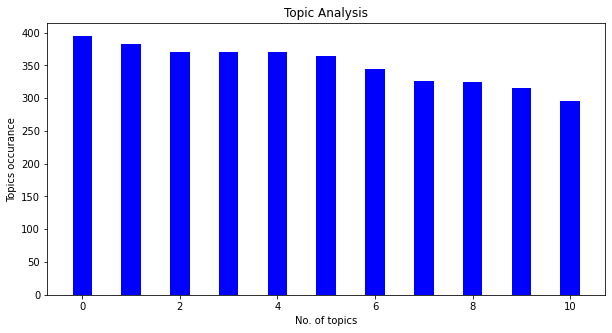

In [ ]:
# To view which topic has been most researched and funded

import matplotlib.pyplot as plt

courses = list(topic_nums)
values = list(topic_sizes)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
		width = 0.4)

plt.xlabel("No. of topics")
plt.ylabel("Topics occurance")
plt.title("Topic Analysis")
plt.show()


In [ ]:
# piecchart to view the topic which has been funded the most
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(topic_sizes, labels = topic_nums)
 
# show plot
plt.show()

## Creating Topic Wordclouds

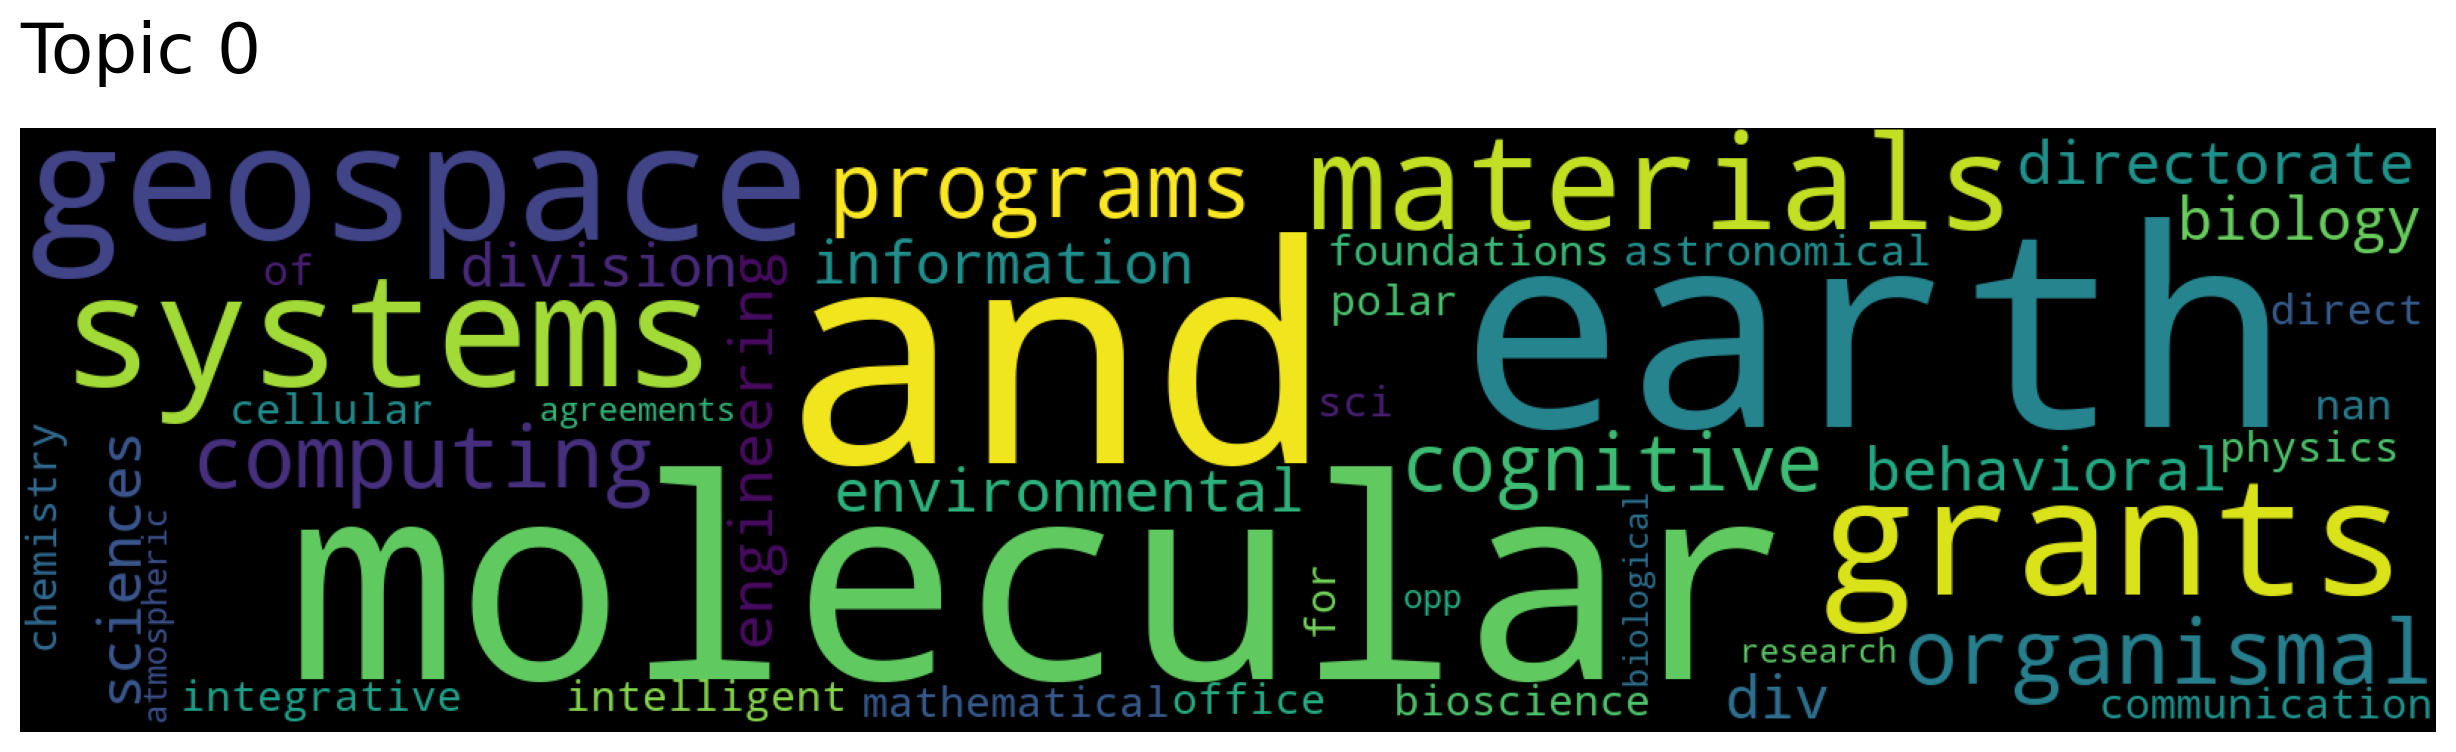

In [ ]:
model.generate_topic_wordcloud(0)

## Accessing Topic Vectors

In [ ]:
model.topic_vectors

array([[-0.07582051,  0.06380595,  0.01423966, ...,  0.05609493,
         0.08462037,  0.11987656],
       [-0.02221986, -0.00954585,  0.0240507 , ..., -0.01456599,
         0.0457045 , -0.05824394],
       [ 0.00092239, -0.07049329,  0.05025506, ...,  0.02130974,
         0.03697268,  0.04634058],
       ...,
       [ 0.03204369,  0.02997976,  0.04379311, ...,  0.10246102,
         0.00771492, -0.00873085],
       [ 0.0265009 ,  0.02011427, -0.05851128, ..., -0.0295989 ,
         0.08418366,  0.10487431],
       [ 0.02006551,  0.06810083, -0.03688985, ...,  0.05139789,
        -0.09069063,  0.04247332]], dtype=float32)

## Searching for Topics by Keyword

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["geospace"], num_topics=11)

In [ ]:
topic_scores

array([ 0.15089464,  0.12481277,  0.06690911,  0.04702598,  0.02329588,
        0.00913875,  0.00612425, -0.02457138, -0.03689235, -0.04581684,
       -0.07734325])

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["physics"], num_topics=11)

In [ ]:
topic_scores

array([ 0.09290081,  0.09239542,  0.07549231,  0.03585956,  0.02438731,
        0.01639849,  0.01059454,  0.00964601, -0.02550439, -0.026878  ,
       -0.03339591])

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["chemistry"], num_topics=11)

In [ ]:
topic_scores

array([ 0.10819014,  0.08822221,  0.07723588,  0.05168126,  0.03301871,
        0.03145344,  0.00648683, -0.01044914, -0.01982746, -0.03112864,
       -0.04292251])

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["biology"], num_topics=11)

In [ ]:
topic_scores

array([ 0.18048787,  0.0980097 ,  0.07629835,  0.0649878 ,  0.03829152,
        0.0244941 ,  0.01977702,  0.01008582, -0.01482301, -0.02336222,
       -0.1012917 ])

## Searching for Documents by Topic

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=7)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 2327_1969 Institutional Grants For Science, Score: 0.25149932503700256
-----------
Directorate For Engineering
-----------

Document: 0466_Contract For Committee on Nuclear Science (Transferred From Gp601 to C310, T.O. 47), Score: 0.24911512434482574
-----------
Division Of Chemistry
-----------

Document: 1548_Money and Economic Growth, Score: 0.23983553051948547
-----------
Division Of Behavioral and Cognitive Sci
-----------

Document: 3110_Theoretical Astrophysics, Score: 0.2303897589445114
-----------
Division Of Astronomical Sciences
-----------

Document: 0671_Support of the Committee on Fire Research (C310 T.O. 86), Score: 0.22916962206363678
-----------
Directorate For Engineering
-----------

Document: 1596_Support of the Committee on Atmospheric Sciences            (C310 - T.O. 9), Score: 0.21477827429771423
-----------
Div Atmospheric & Geospace Sciences
-----------

Document: 1197_Group Theory, Score: 0.21450001001358032
-----------
Division Of Chemistry
--------

## Reducing the Number of Topics

In [ ]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=10)

In [ ]:
topic_mapping[1]

[3]

In [ ]:
model.topic_words_reduced[0]

array(['astronomical', 'geospace', 'of', 'division', 'organismal',
       'direct', 'agreements', 'chemistry', 'programs', 'communication',
       'opp', 'bioscience', 'foundations', 'grants', 'cellular', 'div',
       'systems', 'engineering', 'molecular', 'physics', 'office',
       'research', 'biological', 'directorate', 'environmental',
       'behavioral', 'polar', 'earth', 'atmospheric', 'cognitive',
       'computing', 'for', 'sciences', 'and', 'biology', 'sci',
       'information', 'intelligent', 'nan', 'integrative', 'materials',
       'mathematical'], dtype='<U13')